<a href="https://colab.research.google.com/github/Chandana2217/EliteTech-Intern/blob/main/TASK_2_Sentiment_Analysis_With_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 2**

**SENTIMENT ANALYSIS**
**WITH NLP**
**PERFORM SENTIMENT ANALYSIS ON A DATASET OF**
**CUSTOMER REVIEWS USING TF-IDF VECTORIZATION**
**AND LOGISTIC REGRESSION.**
**DELIVERABLE: A JUPYTER NOTEBOOK SHOWCASING**
**PREPROCESSING, MODELING, AND SENTIMENT**
**EVALUATION**


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Download NLTK movie reviews dataset**

In [ ]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

**Load Dataset**
**Load movie reviews into lists**

In [ ]:
documents = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        documents.append((movie_reviews.raw(fileid), category))

**Convert into DataFrame**

In [ ]:
df = pd.DataFrame(documents, columns=['review', 'sentiment'])
print("Dataset Sample:")
print(df.head())


Dataset Sample:
                                              review sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard's quick movie review \ndamn ...       neg
2  it is movies like these that make a jaded movi...       neg
3   " quest for camelot " is warner bros . ' firs...       neg
4  synopsis : a mentally unstable man undergoing ...       neg


**Encode Labels (Positive = 1, Negative = 0)**

In [ ]:
df['label'] = df['sentiment'].map({'pos': 1, 'neg': 0})

**Split Data into Train/Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

**TF-IDF Vectorization**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**Train Logistic Regression Model**

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

**Predictions**

In [ ]:
y_pred = model.predict(X_test_tfidf)

**Evaluation**

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       200
           1       0.81      0.86      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Accuracy: 0.8275


**Confusion Matrix Visualization**

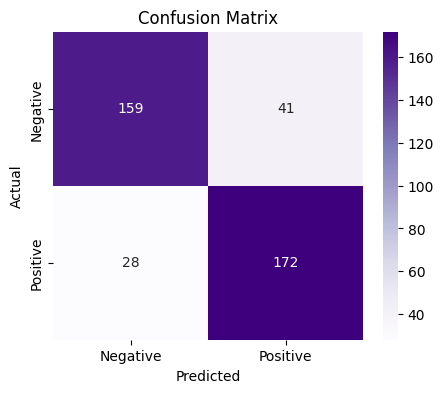

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples', fmt='d',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Feature Importance Visualization (Top Words)**

**Get feature weights from logistic regression**

In [ ]:
feature_names = np.array(vectorizer.get_feature_names_out())
coef = model.coef_.ravel()

top_positive_indices = np.argsort(coef)[-10:]
top_negative_indices = np.argsort(coef)[:10]

top_words = pd.DataFrame({
    'Positive Words': feature_names[top_positive_indices],
    'Negative Words': feature_names[top_negative_indices]
})

print("\nTop Positive and Negative Words:")
print(top_words)


Top Positive and Negative Words:
  Positive Words Negative Words
0          mulan            bad
1        overall          worst
2         truman           plot
3        perfect         boring
4           best          movie
5         family       supposed
6      excellent         script
7            war         reason
8           life          waste
9          great         stupid


**Test with New Sentences**

In [ ]:
new_reviews = [
    "This movie was absolutely fantastic, I loved every part of it!",
    "It was a terrible movie, waste of time and money."
]

X_new = vectorizer.transform(new_reviews)
predictions = model.predict(X_new)

for review, pred in zip(new_reviews, predictions):
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {'Positive' if pred == 1 else 'Negative'}")



Review: This movie was absolutely fantastic, I loved every part of it!
Predicted Sentiment: Positive

Review: It was a terrible movie, waste of time and money.
Predicted Sentiment: Negative
